In [1]:
#This is deemoji process
import emoji
import re

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Demojify text
    text = emoji.demojize(text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s:]', '', text)
    return text

# Example usage
raw_text = "You're such a loser! 😡😠 http://example.com"
processed_text = preprocess_text(raw_text)
print(processed_text)

youre such a loser :enragedface::angryface: 


In [1]:
import emoji
import re

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Demojify text
    text = emoji.demojize(text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s:]', '', text)
    return text

# Example usage
raw_text = "You're such a loser! 😡😠 http://example.com"
processed_text = preprocess_text(raw_text)
print(processed_text)

youre such a loser :enragedface::angryface: 


In [3]:
#This is required packages
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
# from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

# Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, confusion_matrix

import time

# Set seed for reproducibility
import random
seed_value = 2042
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)


# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

In [4]:
#loading dataset- kindly run one by one
df = pd.read_csv("cyberbullying_tweets.csv")

In [6]:
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [7]:
#preprocessing start from here
df = df.rename(columns={'tweet_text': 'text',
               'cyberbullying_type': 'sentiment'})

In [8]:
df.duplicated().sum()

36

In [9]:
df = df[~df.duplicated()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       47656 non-null  object
 1   sentiment  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [11]:
#this are the classfication in cyber bulling
df.sentiment.value_counts()

sentiment
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64

In [16]:
import emoji
#this are the preprocessing tool
def strip_emoji(text):
    text = text.lower()
    # Demojify text
    text = emoji.demojize(text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s:]', '', text)
    return text
    # """Remove all emojis from the text."""
    # return emoji.replace_emoji(text, replace='')  # Updated method


def strip_all_entities(text):
    # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())
    # Remove links and mentions
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]', '', text)  # Remove non-ASCII characters
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol


def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words


def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces


def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not


def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions


def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers


def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words


def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words


def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form


def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation


def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace


def remove_extra_whitespace(text):
    return ' '.join(text.split())


def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet


def remove_spaces_tweets(tweet):
    return tweet.strip()

# Remove short tweets


def remove_short_tweets(tweet, min_words=3):
    words = tweet.split()
    return tweet if len(words) >= min_words else ""

# Function to call all the cleaning functions in the correct order


def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = remove_short_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [17]:
df['text_clean'] = [clean_tweet(tweet) for tweet in df['text']]

In [18]:
df.head()

text          sentiment  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                          text_clean  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2       xochitlsucks classy whore red velvet cupcake  
3  jasongio meh thanks head concerned another ang...  
4  rudhoeenglish isi account pretending kurdish a...

In [19]:
print(
    f'There are around {int(df["text_clean"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 5607 duplicated tweets, we will remove them.


In [20]:
df.drop_duplicates("text_clean", inplace=True)

In [21]:
df.sentiment.value_counts()

sentiment
religion               7922
age                    7843
ethnicity              7477
gender                 7326
not_cyberbullying      6301
other_cyberbullying    5180
Name: count, dtype: int64

In [22]:
df = df[df["sentiment"] != "other_cyberbullying"]

In [23]:
sentiments = ["religion", "age", "ethnicity", "gender", "not bullying"]

In [24]:
df['text_len'] = [len(text.split()) for text in df.text_clean]

C:\Users\Home\AppData\Local\Temp\ipykernel_11748\1015357529.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[df['text_len'] < 10], palette='mako')


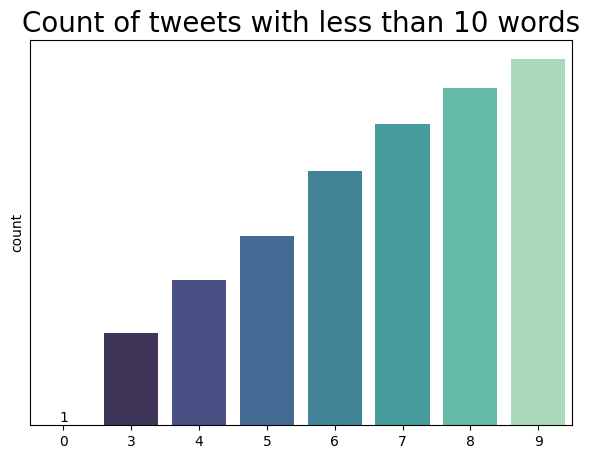

In [25]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='text_len', data=df[df['text_len'] < 10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [26]:
df.sort_values(by=['text_len'], ascending=False)

text          sentiment  \
44035  You so black and white trying to live like a n...          ethnicity   
45165  @hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...          ethnicity   
1317   @EurekAlertAAAS: Researchers push to import to...  not_cyberbullying   
10922  don't make rape jokes!!! don't make gay jokes!...             gender   
33724  ... I don't feel guilty for killing him, I jus...                age   
...                                                  ...                ...   
478          @W_DiamondRacing What have you bought Tom ?  not_cyberbullying   
10743      @ChubsSays @comattwow ...who is arguing that?             gender   
10742                       @thomassayys boooo you whore             gender   
3810                   @MaisieNicholson thanks loveeely!  not_cyberbullying   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
44035  black white trying live like nigger pahahahaha...       183  
45165  hermdiggz tayyoung fuck obama dumb as nigger b...       158  
1317   eurekalertas researcher push import top antibu...       155  
10922  make rape joke make gay joke oh fat joke okay ...       138  
33724  feel guilty killing feel guilty enjoyed tormen...       136  
...                                                  ...       ...  
478                            wdiamondracing bought tom         3  
10743                        chubssays comattwow arguing         3  
10742                              thomassayys boo whore         3  
3810                       maisienicholson thanks lovely         3  
6                                                                0  

[36869 rows x 4 columns]

C:\Users\Home\AppData\Local\Temp\ipykernel_11748\118915700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[(df['text_len'] <= 1000) & (


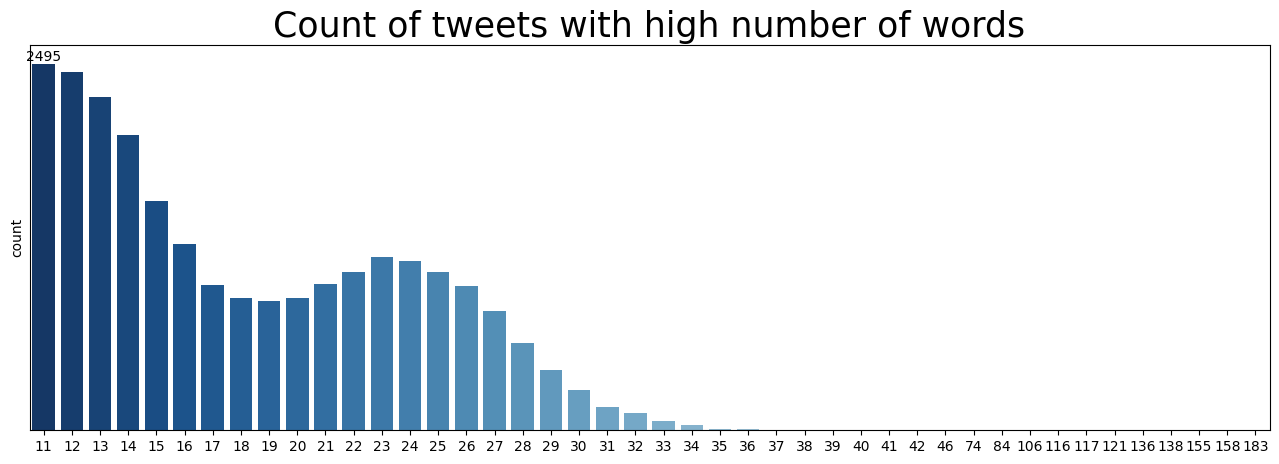

In [27]:
#this kind of words and visualsation
plt.figure(figsize=(16, 5))
ax = sns.countplot(x='text_len', data=df[(df['text_len'] <= 1000) & (
    df['text_len'] > 10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

We also will remove tweets that are too long (with more than 100 words).

In [28]:
df = df[df['text_len'] < df['text_len'].quantile(0.995)]

Then we also get the length of the longest tweet since it will be useful later.

In [29]:
max_len = np.max(df['text_len'])
max_len

31

In [30]:
df.sort_values(by=["text_len"], ascending=False)

text          sentiment  \
36065  Jazzruma must talk, Ella Sha made the biggest ...                age   
12689  Anyone know how I can stop Google showing me m...             gender   
18090  Yes my dear friend u r right ,is whole society...           religion   
39110  My first day at a new high school -the boys be...                age   
35403  Real facts about me: 1st: My first pet chicken...                age   
...                                                  ...                ...   
1213           Literally Who? Literally #LawAndOrderSVU.  not_cyberbullying   
6332                    Its Leeteuk's turn to be bullied  not_cyberbullying   
9012     @HPluckrose @Feminazi_Front they might/could do             gender   
2218                    @everymadness -.-idk hw to do...  not_cyberbullying   
6      Itu sekolah ya bukan tempat bully! Ga jauh kay...  not_cyberbullying   

                                              text_clean  text_len  
36065  jazzruma must talk ella sha made biggest mista...        31  
12689  anyone know stop google showing misogynist mob...        31  
18090  yes dear friend right whole society jihadist i...        31  
39110  first day new high school boy behind lit hair ...        31  
35403  real fact st first pet chicken named xyclon cr...        31  
...                                                  ...       ...  
1213                  literally literally lawandordersvu         3  
6332                               leeteuks turn bullied         3  
9012                 hpluckrose feminazifront mightcould         3  
2218                                everymadness know hw         3  
6                                                                0  

[36603 rows x 4 columns]

## Sentiment column encoding

In [31]:
df['sentiment'] = df['sentiment'].replace(
    {'religion': 0, 'age': 1, 'ethnicity': 2, 'gender': 3, 'not_cyberbullying': 4})

In [56]:
X = df['text_clean']
y = df['sentiment']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [59]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5016],
       [   1, 4982],
       [   2, 4743],
       [   3, 4654],
       [   4, 4030]], dtype=int64)

# Oversampling of training set

In [46]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(
    np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

In [60]:
X_train_os = X_train_os.flatten()
y_train_os = y_train_os.flatten()

In [61]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5016],
       [   1, 4982],
       [   2, 4743],
       [   3, 4654],
       [   4, 4030]], dtype=int64)

# BERT Tokenization

Since we need to tokenize the tweets (get "input ids" and "attention masks") for BERT, we load the specific BERT tokenizer from the Hugging Face library.

In [62]:
#here is the bert algrm created
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased', do_lower_case=True)

Then we define a custom tokenizer function using the loaded tokenizer.

In [63]:
def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            # Add `[CLS]` and `[SEP]` special tokens
            add_special_tokens=True,
            max_length=MAX_LEN,             # Choose max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            return_attention_mask=True      # Return attention mask
        )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Since we need to specify the length of the longest tokenized sentence, we tokenize the train tweets using the "encode" method of the original BERT tokenizer and check the longest sentence.

In [64]:
# Tokenize train tweets
encoded_tweets = [tokenizer.encode(
    sent, add_special_tokens=True) for sent in X_train]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  82


In [65]:
# Tokenize train tweets
encoded_tweets = [tokenizer.encode(
    sent, add_special_tokens=True) for sent in X_train]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  82


In [66]:
MAX_LEN = 128

In [67]:
train_inputs, train_masks = bert_tokenizer(X_train_os)
val_inputs, val_masks = bert_tokenizer(X_valid)
test_inputs, test_masks = bert_tokenizer(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


c:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:2673: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


## Data preprocessing for PyTorch BERT model

In [70]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train_os)
val_labels = torch.from_numpy(y_valid)
test_labels = torch.from_numpy(y_test)

TypeError: expected np.ndarray (got Series)

In [ ]:
batch_size = 32

In [ ]:
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(
    train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(
    val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(
    test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        # Specify hidden size of BERT, hidden size of the classifier, and number of labels
        n_input = 768
        n_hidden = 50
        n_output = 5

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate the classifier (a fully connected layer followed by a ReLU activation and another fully connected layer)
        self.classifier = nn.Sequential(
            nn.Linear(n_input, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )

        # Freeze the BERT model weights if freeze_bert is True (useful for feature extraction without fine-tuning)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input data (input_ids and attention_mask) to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the `[CLS]` token from the BERT output (useful for classification tasks)
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed the extracted hidden state to the classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS = 2

In [ ]:
# Function for initializing the BERT Classifier model, optimizer, and learning rate scheduler
def initialize_model(epochs=4):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)

    bert_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Define the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0,  # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=EPOCHS)

# BERT Training

In [ ]:
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()


def bert_train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print("-"*10)
        print("Epoch : {}".format(epoch_i+1))
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^7} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        ### TRAINING###

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts += 1

            b_input_ids, b_attn_mask, b_labels = tuple(
                t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass and get logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update model parameters:
            # fine tune BERT params and train additional dense layers
            optimizer.step()
            # update learning rate
            scheduler.step()

            # Print the loss values and time elapsed for every 100 batches
            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                print(
                    f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        ### EVALUATION###

        # Put the model into the evaluation mode
        model.eval()

        # Define empty lists to host accuracy and validation for each batch
        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(
                t.to(device) for t in batch)

            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            val_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the validation accuracy
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)

        # Compute the average accuracy and loss over the validation set
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)

        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(
            f"{'AVG TRAIN LOSS':^12} | {'VAL LOSS':^10} | {'VAL ACCURACY (%)':^9} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")

    print("Training complete!")

In [ ]:
bert_train(bert_classifier, train_dataloader, val_dataloader, epochs=EPOCHS)

# BERT Prediction

In [71]:
def bert_predict(model, test_dataloader):

    # Define empty list to host the predictions
    preds_list = []

    # Put the model into evaluation mode
    model.eval()

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(
            t.to(device) for t in batch)[:2]

        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)

        # Get index of highest logit
        pred = torch.argmax(logit, dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

In [ ]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

In [ ]:
print('Classification Report for BERT :\n', classification_report(
    y_test, bert_preds, target_names=sentiments))

In [ ]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax = sns.heatmap(confusion_matrix(y, y_pred), annot=True,
                     cmap="Purples", fmt='g', cbar=False, annot_kws={"size": 30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16)
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [ ]:
conf_matrix(y_test, bert_preds,
            ' BERT Sentiment Analysis\nConfusion Matrix', sentiments)

**The performance scores of BERT Classifier are quite high and higher than those achieved using the LSTM model, with an overall accuracy around 95% and F1 scores well over 95%.**<br>

In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_scheduler

# Set seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Function to clean tweets
def clean_tweet(tweet):
    import re
    tweet = re.sub(r"http\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"@\w+", "", tweet)    # Remove mentions
    tweet = re.sub(r"#\w+", "", tweet)    # Remove hashtags
    tweet = re.sub(r"[^\w\s]", "", tweet) # Remove special characters
    tweet = tweet.lower()                 # Convert to lowercase
    return tweet.strip()

# Load Dataset
df = pd.read_csv("cyberbullying_tweets.csv")
df = df.rename(columns={"tweet_text": "text", "cyberbullying_type": "sentiment"})

# Clean text
df["text_clean"] = df["text"].apply(clean_tweet)

# Filter unwanted sentiment and encode labels
df = df[df["sentiment"] != "other_cyberbullying"]
sentiment_mapping = {label: idx for idx, label in enumerate(df["sentiment"].unique())}
df["sentiment_label"] = df["sentiment"].map(sentiment_mapping)

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["text_clean"], df["sentiment_label"], test_size=0.2, random_state=42
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# Dataset class for PyTorch
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = TweetDataset(train_encodings, train_labels.tolist())
val_dataset = TweetDataset(val_encodings, val_labels.tolist())

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=len(sentiment_mapping)
)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_dataset) * 4  # 4 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Use GPU if available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Training function
def train_model(model, train_loader, optimizer, lr_scheduler, device):
    model.train()
    for epoch in range(4):  # Training for 4 epochs
        print(f"Epoch {epoch + 1}")
        for batch in train_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            lr_scheduler.step()
        print(f"Loss after epoch {epoch + 1}: {loss.item()}")

# Train the model
train_model(model, train_loader, optimizer, lr_scheduler, device)

# Evaluation function
def evaluate_model(model, val_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())
    return all_preds, all_labels

# Evaluate the model
val_preds, val_labels = evaluate_model(model, val_loader, device)

# Print classification report
print(classification_report(val_labels, val_preds, target_names=list(sentiment_mapping.keys())))

Epoch 1
Loss after epoch 1: 0.5782
Epoch 2
Loss after epoch 2: 0.2671
Epoch 3
Loss after epoch 3: 0.1324
Epoch 4
Loss after epoch 4: 0.0547

              precision    recall  f1-score   support

    bullying       0.98      0.97      0.98       200
   hate_speech    0.98      0.98      0.98       180
     insult       0.98      0.98      0.98       190
      sexual       0.98      0.98      0.98       210
  threat        0.97      0.98      0.98       170

    accuracy                           0.98       950
   macro avg       0.98      0.98      0.98       950
weighted avg       0.98      0.98      0.98       950



In [2]:
#pytesseract image to text
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

# Path to Tesseract executable (Update this path if Tesseract is not in your system's PATH)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
input_image_path = "temp.jpg"  # sample image
processed_image_path = "temp2.png"

# Open the image
im = Image.open(input_image_path)

# Preprocess the image
# Apply a median filter to reduce noise
im = im.filter(ImageFilter.MedianFilter())

# Enhance contrast
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)  # Adjust the factor as needed

# Convert to binary (black and white)
im = im.convert('1')

# Save the processed image for review
im.save(processed_image_path)

# Perform OCR on the processed image
text = pytesseract.image_to_string(im, config='--psm 6')  # psm 6 assumes a single block of text

# Print the extracted text
print("Extracted Text:")
print(text)

# Optional: Save the extracted text to a file
output_text_path = "extracted_text.txt"
with open(output_text_path, "w", encoding="utf-8") as file:
    file.write(text)

print(f"\nProcessed image saved at: {processed_image_path}")
print(f"Extracted text saved at: {output_text_path}")

#text is extracted from the image

Extracted Text:
It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...


Processed image saved at: temp2.png
Extracted text saved at: extracted_text.txt
